<a href="https://colab.research.google.com/github/HIsu1231/AI_INOVATION_SQUARE/blob/master/softmax_Diabetesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

np.random.seed(0)

In [9]:
# 수치미분 함수

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

# sigmoid 함수

def sigmoid(x):
    return 1 / (1+np.exp(-x))

#softmax 함수

def softmax(z):

  c = np.max(z)

  numerator = np.exp(z-c)
  denominator = np.sum(np.exp(z-c))

  y = numerator / denominator
  
  return y

In [13]:
class DataGeneration:

  def __init__(self, file_path, seperation_rate, target_position = -1):

    self.file_path = file_path

    self.seperation_rate = seperation_rate

    if target_position == -1 or target_position == 0:
      self.target_position = target_position
    else:
      err_str = "target position must be -1 or 0"
      raise Exception(err_str)

  def __display_target_distribution(self, data, str_of_kind = 'original data'):

    print("==================================================================")

    target_data = data[:,self.target_position]

    unique, counts = np.unique(target_data,return_counts=True)

    for i in range(len(unique)):
      print("[DataGeneration] unique number of ",str_of_kind," = ",unique[i],",counts = ",counts[i])

    for i in range(len(unique)):
      print("[DataGeneration] unique number of ",str_of_kind," = ",", ratio = ",np.round(100*counts[i]/len(target_data),2),'%')

    print("==================================================================")

  def generate(self):
    
    try:
      loaded_data = np.loadtxt(self.file_path, delimiter=',',dtype=np.float32)
    
    except Exception as err:
      print("[DataGeneration::generate()]",str(err))
      raise Exception(str(err))

    print("[DataGeneration] loaded data.shape = ",loaded_data.shape)

    self.__display_target_distribution(loaded_data,'original data')

    total_data_num = len(loaded_data)
    test_data_num = int(total_data_num * self.seperation_rate)

    np.random.shuffle(loaded_data)

    test_data = loaded_data[0:test_data_num]
    training_data = loaded_data[test_data_num: ]

    self.__display_target_distribution(training_data,'training data')
    self.__display_target_distribution(test_data,'test data')
    
    return training_data, test_data

In [14]:
class Diabetes:

  def __init__(self, i_nodes, h_nodes, o_nodes, lr):

    self.W2 = np.random.randn(i_nodes,h_nodes) / np.sqrt(i_nodes/2)
    self.b2 = np.random.rand(h_nodes)

    self.W3 = np.random.randn(h_nodes,o_nodes) / np.sqrt(h_nodes/2)
    self.b3 = np.random.rand(o_nodes)

    self.lr = lr

  def feed_forward(self):

    delta = 1e-7

    z2 = np.dot(self.input_data,self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.W3) + self.b3
    y = a3 = softmax(z3)

    return -np.sum(self.target_data*np.log(y+delta) + (1-self.target_data)*np.log((1-y)+delta))

  def loss_val(self):

    delta = 1e-7

    z2 = np.dot(self.input_data,self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.W3) + self.b3
    y = a3 = softmax(z3)

    return -np.sum(self.target_data*np.log(y+delta) + (1-self.target_data)*np.log((1-y)+delta))

  def predict(self,input_data):

    z2 = np.dot(input_data,self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2,self.W3) + self.b3
    y = a3 = softmax(z3)

    predicted_num = np.argmax(y)

    return predicted_num

  def accuracy(self,input_data, target_data):

    matched_list = []
    unmatched_list = []

    for i in range(len(input_data)):
      
      predicted_num = self.predict(input_data[i])

      if target_data[i] == predicted_num:
        matched_list.append(i)
      else:
        unmatched_list.append(i)

    accuracy_result = len(matched_list)/len(input_data)

    return unmatched_list, accuracy_result

  def train(self,input_data,target_data):

    self.input_data = input_data
    self.target_data = target_data

    f = lambda x : self.feed_forward()

    self.W2 -= self.lr * numerical_derivative(f,self.W2)
    self.b2 -= self.lr * numerical_derivative(f,self.b2)

    self.W3 -= self.lr * numerical_derivative(f,self.W3)
    self.b3 -= self.lr * numerical_derivative(f,self.b3)

In [15]:
test_seperation_rate = 0.3

data_obj = DataGeneration('./drive/My Drive/AI_INOVATION_SQUARE/data/(200309)diabetes.csv',test_seperation_rate)

(training_data, test_data) = data_obj.generate()

print("=================================================")
print("training data shape = ",training_data.shape)
print("test data.shape = ",test_data.shape)
print("=================================================")

[DataGeneration] loaded data.shape =  (759, 9)
[DataGeneration] unique number of  original data  =  0.0 ,counts =  263
[DataGeneration] unique number of  original data  =  1.0 ,counts =  496
[DataGeneration] unique number of  original data  =  , ratio =  34.65 %
[DataGeneration] unique number of  original data  =  , ratio =  65.35 %
[DataGeneration] unique number of  training data  =  0.0 ,counts =  180
[DataGeneration] unique number of  training data  =  1.0 ,counts =  352
[DataGeneration] unique number of  training data  =  , ratio =  33.83 %
[DataGeneration] unique number of  training data  =  , ratio =  66.17 %
[DataGeneration] unique number of  test data  =  0.0 ,counts =  83
[DataGeneration] unique number of  test data  =  1.0 ,counts =  144
[DataGeneration] unique number of  test data  =  , ratio =  36.56 %
[DataGeneration] unique number of  test data  =  , ratio =  63.44 %
training data shape =  (532, 9)
test data.shape =  (227, 9)


In [18]:
i_nodes = training_data.shape[1] - 1
h_nodes = 10
o_nodes = 2

lr = 1e-2
epochs = 20

loss_val_list= []

obj1 = Diabetes(i_nodes,h_nodes,o_nodes,lr)

print("Neural Network Learning using Numerical Derivative...")

start_time = datetime.now()

for step in range(epochs):
  for i in range(len(training_data)):
    input_data = training_data[i,0:-1]
    
    target_data = np.zeros(o_nodes) + 0.01
    target_data[int(training_data[i,-1])] = 0.99

    obj1.train(input_data,target_data)

  cur_loss_val = obj1.loss_val()
  loss_val_list.append(cur_loss_val)

  print("step = ",step,", loss value = ",cur_loss_val)

end_time = datetime.now()

print("")
print("Elapsed tiem => ",end_time - start_time)

Neural Network Learning using Numerical Derivative...
step =  0 , loss value =  1.7572321835122322
step =  1 , loss value =  1.7425673405369575
step =  2 , loss value =  1.7069595493855463
step =  3 , loss value =  1.6534415535876281
step =  4 , loss value =  1.5905716208377565
step =  5 , loss value =  1.5272929751510915
step =  6 , loss value =  1.4695158603828347
step =  7 , loss value =  1.419827090692638
step =  8 , loss value =  1.3785942848321167
step =  9 , loss value =  1.3450657919494682
step =  10 , loss value =  1.3180809836042855
step =  11 , loss value =  1.2964414980771597
step =  12 , loss value =  1.2790722485867767
step =  13 , loss value =  1.2650717354713112
step =  14 , loss value =  1.2537110227060821
step =  15 , loss value =  1.2444125749365267
step =  16 , loss value =  1.236723913318142
step =  17 , loss value =  1.23029254915845
step =  18 , loss value =  1.2248445001751689
step =  19 , loss value =  1.2201668063579383

Elapsed tiem =>  0:01:42.425724


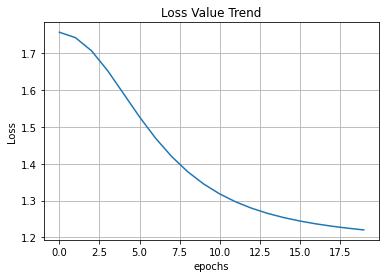

In [19]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()

In [20]:
test_input_data = test_data[:,0:-1]
test_target_data = test_data[:,-1]

(false_list, accuracy_ret) = obj1.accuracy(test_input_data, test_target_data)

print("Test Data Accuracy = ", np.round(accuracy_ret, 3))

Test Data Accuracy =  0.797
